<a href="https://colab.research.google.com/github/Code-Test-Source/MCM26-25Crepo/blob/main/Figure2%20PCA(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


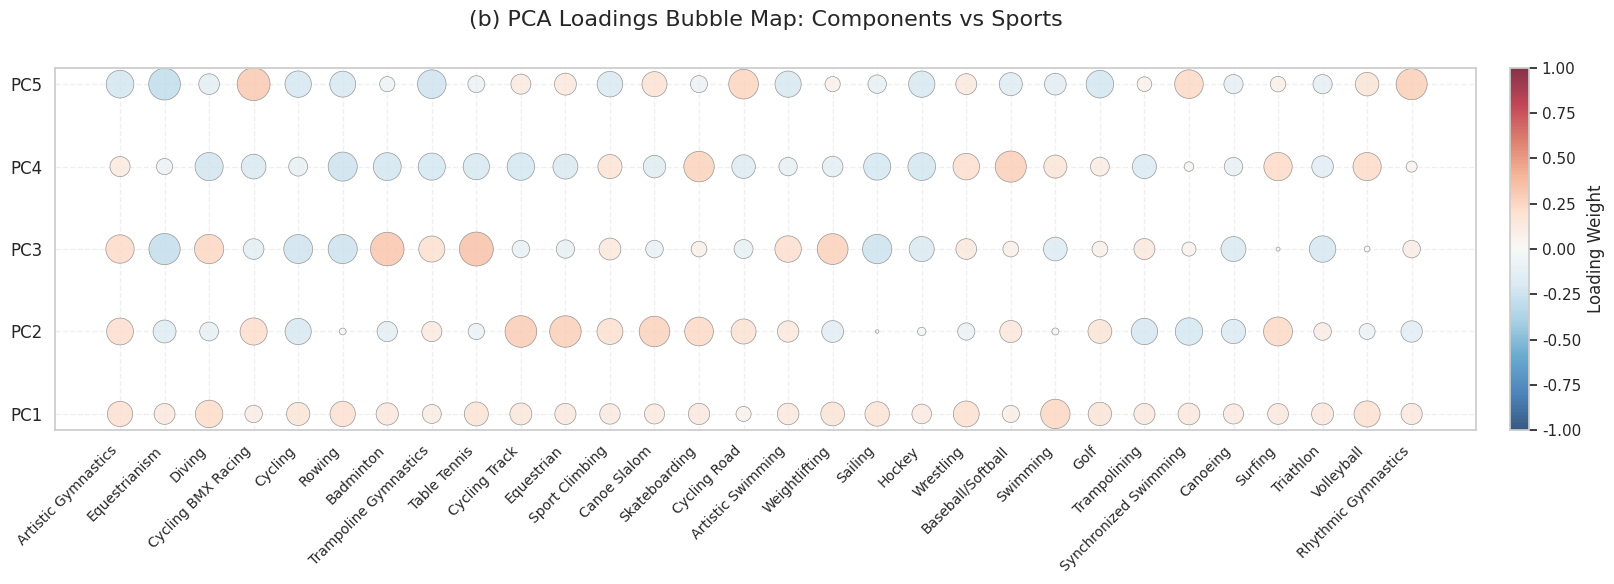

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import os

# 1. 挂载 Google Drive
drive.mount('/content/drive')

# 2. 定义文件路径
file_path = '/content/drive/MyDrive/summerOly_athletes_processed.csv'

if not os.path.exists(file_path):
    print(f"错误：请确认文件已上传。")
else:
    # 3. 数据处理 (引用自 pca_sport_reduction (1).py 逻辑)
    df = pd.read_csv(file_path)
    pivot_df = df.pivot_table(index=['Year', 'Mapped_NOC', 'is_host'],
                              columns='Sport',
                              values='Total',
                              aggfunc='sum',
                              fill_value=0)

    # 4. 执行 PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(pivot_df)
    pca = PCA(n_components=5)
    pca.fit(X_scaled)

    # 5. 准备载荷数据
    pc_names = [f'PC{i+1}' for i in range(5)]
    # 筛选贡献最大的前 30 个项目以防图表过挤
    loadings_df = pd.DataFrame(pca.components_, columns=pivot_df.columns, index=pc_names)
    top_sports = loadings_df.abs().sum(axis=0).sort_values(ascending=False).head(30).index
    loadings_filtered = loadings_df[top_sports]

    # 6. 构建气泡图坐标
    x, y = np.meshgrid(np.arange(loadings_filtered.shape[1]), np.arange(loadings_filtered.shape[0]))
    x = x.flatten()
    y = y.flatten()
    values = loadings_filtered.values.flatten()

    # 7. 绘图
    plt.figure(figsize=(18, 6))

    # 颜色映射：RdBu_r (红正蓝负)
    # 大小映射：使用绝对值的平方来拉开视觉差距
    scatter = plt.scatter(x, y,
                          s=np.abs(values) * 2000,  # 调整圆圈大小
                          c=values,                 # 颜色代表数值
                          cmap='RdBu_r',
                          alpha=0.8,
                          edgecolors='gray',
                          linewidth=0.5,
                          vmin=-1, vmax=1)          # 固定颜色比例尺

    # 8. 修改文字方向与坐标轴
    plt.xticks(np.arange(loadings_filtered.shape[1]), loadings_filtered.columns,
               rotation=45, ha='right', fontsize=10) # 运动项目文字倾斜 45 度
    plt.yticks(np.arange(loadings_filtered.shape[0]), loadings_filtered.index, fontsize=12)

    # 添加颜色条
    plt.colorbar(scatter, label='Loading Weight', pad=0.02)

    # 装饰
    plt.title('(b) PCA Loadings Bubble Map: Components vs Sports', fontsize=16, pad=30)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()

    plt.show()
